<a href="https://colab.research.google.com/github/SaltySugar32/MachineLearningCourse/blob/main/labs(bachelor)/%D0%9F%D0%BE%D0%BB%D0%B5%D1%81%D1%8F_%D0%913_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейные методы классификации

##Материалы для изучения

* [Машинное обучение (курс лекций, К.В. Воронцов). Метод опорных векторов](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_(%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9,_%D0%9A.%D0%92.%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D1%86%D0%BE%D0%B2)#.D0.9C.D0.B5.D1.82.D0.BE.D0.B4_.D0.BE.D0.BF.D0.BE.D1.80.D0.BD.D1.8B.D1.85_.D0.B2.D0.B5.D0.BA.D1.82.D0.BE.D1.80.D0.BE.D0.B2)
* [Руководство по настройке параметров SVM](https://www.machinelearningmastery.ru/a-guide-to-svm-parameter-tuning-8bfe6b8a452c/)

## Задание
1. Задание необходимо выполнить в среде Google Colaboratory.
2. Использовать выборку из предыдущих заданий или с https://archive.ics.uci.edu/ml/datasets.php.
3. Разбить выборку на обучающую и контрольную в пропорциях 80%-20% или 70%-30%.
4. Для алгоритма "**Метод опорных векторов (SVM)**" настроить параметры:
* *гиперпараметр регуляризации C* (от 0.001 до 1К),
* *ядро*: линейное (linear), ядро RBF (rbf), полиномиальное (poly), сигмоидальное (sigmoid).


## Библиотеки

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np
import torch

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification, load_iris
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions

In [ ]:
import warnings
warnings.filterwarnings("ignore")

---
##Выборка данных "Balance-Scale Dataset"

*   Предметная область: Классификация состояния весов
*   Задача: классифицировать состояния весов
*   Классы: 3 - перевес влево, перевес вправо, сбалансированные весы
*   Признаки: 4 - вес левой/правой чаши, длина левого/правого плеча весов
*   Объекты: 625


##Метод опорных векторов (SVM)

In [ ]:
# Загрузка выборки 
dataset_dir ="https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data"
data = pd.read_csv(dataset_dir, names=["class", "lw", "ld", "rw", "rd"])

#также, как и в пред. лабе, сделал 2 признака из 4х дефолтных:
Xl = np.vstack(data['lw'].multiply(data['ld']))
Xr = np.vstack(data['rw'].multiply(data['rd']))

Y = data['class'].replace("L", 0).replace("R", 1).replace("B", 2)

X_train, X_test, Y_train, Y_test = train_test_split(np.hstack([Xl, Xr]), np.hstack([Y]), 
                                                    test_size=0.2, 
                                                    random_state=0)
#print(len(X_train))

500


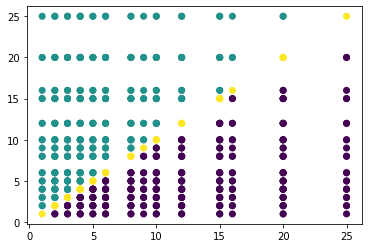

In [ ]:
plt.scatter(Xl, Xr, c=Y)

In [ ]:
# Подбор значения гиперпараметра регуляризации C 
# Я прогнал от 0 до ~30 с интервалом 0.1, увидел, что где-то в 20-30 начались стабильные 1.0 на обучении и контроле
# прогнал 20-30 на 0.01, увидел, что на 23+ начинаются единички

for i in np.arange(23.001, 23.05, 0.001):
  model = SVC(kernel="rbf", C=i)
  model.fit(X_train, Y_train)
  train_score = model.score(X_train, Y_train)
  test_score = model.score(X_test, Y_test)
  if train_score == 1 and test_score == 1:
    print(i,'\tTrain: ', train_score, '\tTest : ', test_score)
    #break
  

23.036000000000044 	Train:  1.0 	Test :  1.0
23.037000000000045 	Train:  1.0 	Test :  1.0
23.038000000000046 	Train:  1.0 	Test :  1.0
23.039000000000048 	Train:  1.0 	Test :  1.0
23.04100000000005 	Train:  1.0 	Test :  1.0
23.04200000000005 	Train:  1.0 	Test :  1.0
23.043000000000053 	Train:  1.0 	Test :  1.0
23.044000000000054 	Train:  1.0 	Test :  1.0
23.045000000000055 	Train:  1.0 	Test :  1.0
23.046000000000056 	Train:  1.0 	Test :  1.0
23.047000000000057 	Train:  1.0 	Test :  1.0
23.04800000000006 	Train:  1.0 	Test :  1.0
23.04900000000006 	Train:  1.0 	Test :  1.0


Как можно увидеть, при с = 23.036000000000044, достигается ~первые лучшие показатели на обучении и контроле. Далее для удобства было принято c=23.037 как лучшее значение гиперпараметра. (при с =23.036 показатель на обучении не идеален)

In [ ]:
# Применение алгоритма классификации
model = SVC(kernel="rbf", C=23.037)
model.fit(X_train, Y_train)

# Accuracy — доля правильных ответов алгоритма
print('Train: ', model.score(X_train, Y_train))
print('Test : ', model.score(X_test, Y_test))
print(classification_report(Y_test, model.predict(X_test)))

Train:  1.0
Test :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00         4

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



### Зависимость результата от константы C

In [ ]:
models = []
scores_train = []
scores_test = []
C_values = list(range(1, 30))
for local_C in C_values:
    model = SVC(kernel="rbf", C=local_C)
    model.fit(X_train, Y_train)
    models.append(model)
    scores_test.append(model.score(X_test, Y_test))
    scores_train.append(model.score(X_train, Y_train))

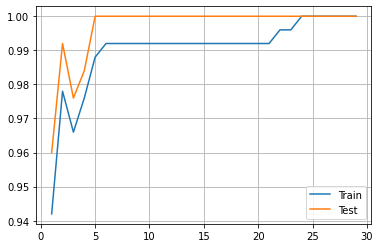

In [ ]:
plt.plot(C_values, scores_train, label='Train')
plt.plot(C_values, scores_test, label='Test')

plt.legend(loc='best')
plt.grid()
plt.show()

Лучшее значение константы C = 23.037

Качество на обучающей выборке: 1.0

Качество на контрольной выборке: 1.0

###Зависимость результата от ядра

In [ ]:
models = []
scores_train = []
scores_test = []
kernels = ('linear', 'poly', 'rbf', 'sigmoid')
for local_kernel in kernels:
    model = SVC(kernel=local_kernel, C=23.037)
    model.fit(X_train, Y_train)
    models.append(model)
    scores_test.append(model.score(X_test, Y_test))
    scores_train.append(model.score(X_train, Y_train))

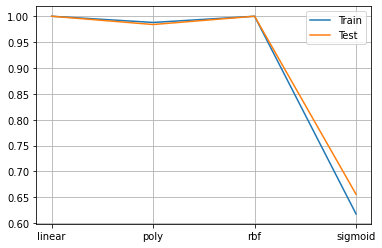

In [ ]:
plt.plot(kernels, scores_train, label='Train')
plt.plot(kernels, scores_test, label='Test')

plt.legend(loc='best')
plt.grid()
plt.show()

Видно, что ядра linear и rbf лучшие. Рассмотрим только их:

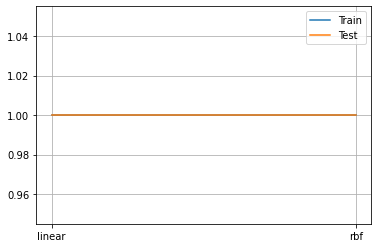

In [ ]:
models = []
scores_train = []
scores_test = []
kernels = ('linear', 'rbf')
for local_kernel in kernels:
    model = SVC(kernel=local_kernel, C=23.037)
    model.fit(X_train, Y_train)
    models.append(model)
    scores_test.append(model.score(X_test, Y_test))
    scores_train.append(model.score(X_train, Y_train))

plt.plot(kernels, scores_train, label='Train')
plt.plot(kernels, scores_test, label='Test')

plt.legend(loc='best')
plt.grid()
plt.show()

Они оказались полностью идентичными :/




---
# Заключение
- Лучшими ядрами являются: linear и rbf
(они идентичны, при лучшем значением гиперпараметра c=23.037 они дают лучшие показатели долей правильных ответов == 1.0 на обучении и контроле)

- Качество на обучающей выборке: 1.0 при c=23.037

- Качество на контрольной выборке: 1.0 при c=23.037